#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesperson Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

## Delivering
**Deadline**: *Friday, February 19, 2021*
**Devilry**: https://devilry.ifi.uio.no

## What to deliver?
On the Devilry website, upload one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: if you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesperson, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)



### Introduction to report 

Authored by Eirik Fredborg, eefredbo.

This report will solve the problem of the travelling salesperson (TSP) by implementing different methods and compare the results. We explore an exhaustive search, a local search (hill climber), a genetic algorithm and a hybdrid algorithm combining the genetic and local search algorithms. In the comparison we will evaluate the performanse of the different algorithms by looking at how long the computing time is, the average optimum produced and the variation of the optima. 

The assignment text will be coloured green in the jupyter notebook.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    

    
    
    
### Exhaustive Search
    
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases.

  
</div>

First we import some modules needed to solve the problems. 

In [1]:
import csv
import numpy as np
import math
import time
import random
from itertools import permutations
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy import units
plt.rcParams['font.size'] = 16

We read in the cvs file. We fill an array with the names of the cities and make a dictionary relating each city to the correct index in the chart. 

In [2]:
# Reading the csv file and storing the distance chart as well as the city names

city_indx = {}
cities = []
dist_chart = np.zeros((24, 24))

with open('european_cities.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    j = 0
    for row in csv_reader:
        if j == 0:
            
            for i in range(len(row)):
                city_indx[row[i]] = i
                cities.append(row[i])
            j+=1
        else:
            dist_chart[j-1,:] = row
            j += 1

We define a general function for determining the total travelled distance for a any given sequence of cities. The function will make the starting city its end destination if it is not already done. 

In [3]:
def dist_func(path):
    if path[0]==path[-1]:
        full_path=path
    else:
        full_path = path+[path[0]]
    steps = int(len(full_path)-1)
    distance = 0
    indxs = 0
    for i in range(steps):
        indxs = [city_indx[full_path[i]], city_indx[full_path[i+1]]]
        trip = dist_chart[indxs[0],indxs[1]]
        distance += trip
    return distance

We define a function to perform an exhaustive search. Note that we will allow the function to determine the optimal starting city.

In [4]:
def exhaustive(N_cities, print_result=False): # performs an exhaustive search on N randonly selected cities 
    start_time = time.time()
    sample = cities[:N_cities]
    #sample += [sample[0]]
    permut_list = permutations(sample,N_cities) # excluding the end points because they are chosen to be static
    optimal_dist = np.inf
    optimal_path = []
    count = 0
    for permut in permut_list:
        count+=1
        path = [i for i in permut]
        dist = dist_func(path)
        if dist<optimal_dist:
            optimal_dist = dist
            optimal_path = path
    tot_time = time.time() - start_time
    optimal_path += [optimal_path[0]]
    if print_result==True:
        print(f'Number of permutations considered {count}')
        print(f'The optimal path is', optimal_path)
        print(f'The corresponding travel distance is {optimal_dist} km')
        print(f"The exhaustive search took %s seconds with a sample of {N_cities} cities" % tot_time)
    return optimal_path, optimal_dist, tot_time


Having defined an exhaustive search function, we perform a search on the first 6 cities. The function will report the findings.

In [5]:
N_cities = 6
optimal_path, optimal_dist, tot_time = exhaustive(N_cities, print_result=True)


Number of permutations considered 720
The optimal path is ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona']
The corresponding travel distance is 5018.8099999999995 km
The exhaustive search took 0.003995180130004883 seconds with a sample of 6 cities


The optimal travelling path for the six cities was found to be $\sim$ 5018 km. 720 permutations were considered. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?
    
  
</div>



We perform the same exhaustive search on the 10 first cities.

In [6]:
N_cities = 10
optimal_path, optimal_dist, tot_time = exhaustive(N_cities, print_result=True)

Number of permutations considered 3628800
The optimal path is ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen']
The corresponding travel distance is 7486.309999999999 km
The exhaustive search took 24.613571882247925 seconds with a sample of 10 cities


We see that the computation time is significantly longer than for 6 cities. We will explore how the computation time evolves as a function of how many cities are considered. We compute the optimal travelling paths for $N\in[4,10]$ cities and present the computation times. Having determined the computation times, we will fit the data to estimate how much time it would take to perform an exhaustive search for all 24 cities. 

In [7]:
# exploring the time an exhaustive search takes as a function of number of cities considered
N = np.arange(4, 10+1, 1) # dont bother with N>11, takes too long time
times = []
for n in N:
    print(f'Computed = {n}/{N[-1]}', end = "\r")
    times.append(exhaustive(int(n))[2])


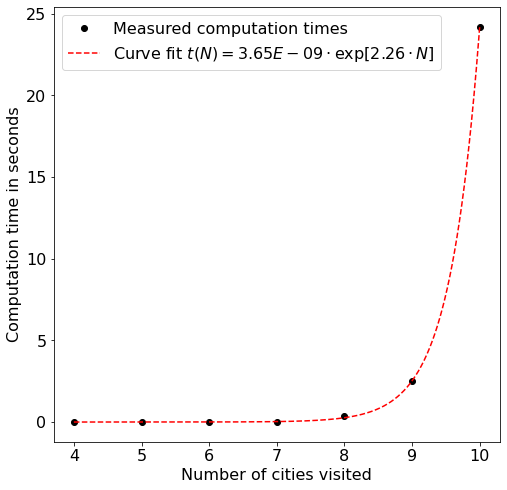

In [8]:

coeff = curve_fit(lambda t,a,b: a*np.exp(b*t),  N,  times)
c0 = coeff[0][0]
c1 = coeff[0][1]
x = np.linspace(4,10,1001)

plt.figure(figsize = (8,8))
plt.plot(N, times, 'ko', label='Measured computation times')
plt.plot(x, c0*np.exp(c1*x), c='r', ls='dashed', 
         label=r'Curve fit $t(N)=%.2E\cdot \exp[%.2f\cdot N]$' % (c0, c1))
plt.xlabel('Number of cities visited')
plt.ylabel('Computation time in seconds')
plt.legend()
plt.show()
# function for estimating computation time as a function of number of cities
def t(N):
    return c0*np.exp(c1*N)

In [9]:
t_24_yr = (t(N=24)*units.s).to('Myr')
print(f'Doing an exhausting search on 24 cities would take an estimated time of %.1f Myr' % t_24_yr.value)

Doing an exhausting search on 24 cities would take an estimated time of 43.1 Myr


Having estimated the time it would take to perform an exhaustive search for all 24 cities, we see that it is quite obvious that one would need a more effective algorithm to perform such a search.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

    
    
## Hill Climbing
    
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**.
    
  
</div>



Using the principles of a hill climber algorithm we define a function that randomly samples the $N$ first cities and evolve the travelling path in a MonteCarlo inspired manner; the algorithm randomly suggests two destinations to swap places and only accepts the swap if it shortens the travelling path. 

In [10]:
def hill_climber(N_cities, N_starts, n = None, true_opt=0, plot=False, print_time=False):
    if n == None:
        n = int(20*N_cities)
    start_time = time.time()
    optimal_dist = []
    optimal_path = []
    new_path=[]
    #shuffle = random.sample(cities[:N_cities], N_cities)
    #path = [cities[0]] + [shuffle[i] for i in range(N_cities-1)] + [cities[0]]
    path = random.sample(cities[:N_cities], N_cities)
    dist = dist_func(path)
    optimal_dist.append(dist)
    optimal_path.append(path+[path[0]])
    count = 0
  
    tol = 5 # if the distance comes within the tolerance to the known optimum, the while loop breakes 
    #and decleares to have found the true optimum
    if plot==True:
        plt.figure(figsize=(8,8))
        plt.title(f'Travelling distance as a function of iterations \n with {N_cities} cities')
        tol = -5 # setting tol to make sure many optimum are explored and plotted
    while np.abs(true_opt-min(optimal_dist))>tol:
        dist_plot = []
        dist_plot.append(dist)
        n_plot = [0]
        if count>N_starts: # N_starts is how many times we shuffle the starting path and try to find another optimum
            #print('Max number of iterations reached')
            break
        for i in range(n):
            new_path=[]
            swap1, swap2 = random.sample(path, 2)
            indx1 = np.where(np.array((path))==swap1)[0][0]
            indx2 = np.where(np.array((path))==swap2)[0][0]
            new_path[:] = path[:] # copy element wise to avoid coupling
            new_path[indx1]= swap2
            new_path[indx2]= swap1
            new_dist = dist_func(new_path)
            if new_dist<dist:
                dist=dist_func(new_path)
                dist_plot.append(dist)
                n_plot.append(i)
                path[:]=new_path[:]
        optimal_dist.append(dist)
        optimal_path.append(path+[path[0]])
        #shuffle = random.sample(cities[1:N_cities], N_cities-1)
        path=[]
        #path = [cities[0]] + [shuffle[i] for i in range(N_cities-1)] + [cities[0]]
        path = random.sample(cities[:N_cities], N_cities)
        dist = dist_func(path)
        count += 1
        if plot ==True:
            plt.plot(n_plot, dist_plot)
    if count<N_starts:
        print('Success, optimum reached!')
    if plot==True:
        plt.plot([0,n], [true_opt,true_opt], c = 'r', ls = 'dashed', lw = 2.0, label='True optimum')
        plt.ylabel('Travel distance, km')
        plt.xlabel('Number of iterations')
        plt.legend()
        plt.show()
    opt_dist = np.min(optimal_dist)
    opt_path = optimal_path[np.where(optimal_dist==opt_dist)[0][0]]
    tot_time = time.time() - start_time
    if print_time==True:
        print(f'Time used was {tot_time} seconds')
    return opt_path, opt_dist, tot_time

The algorithm is not the fastest with all its utility, but it can be used to get an impression of how many iterations are needed to reach a satisfactory results. We initiate 20 randomly selected travelling paths sampling from the 10 first cities, and evolve them for 250 iterations each. The results are plotted.

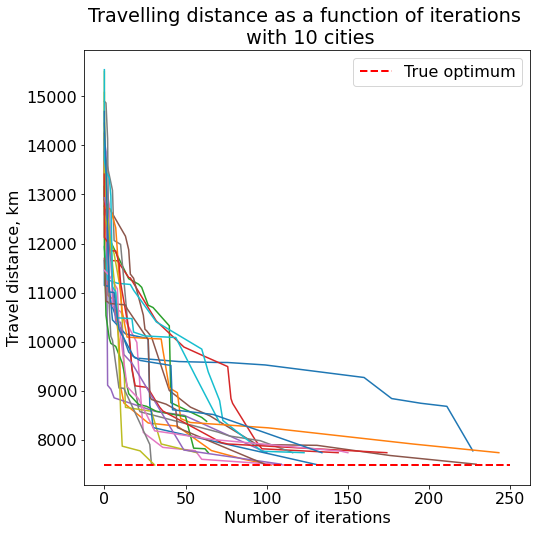

In [11]:
N_cities = 10
iterations = 250
optimal_path_10, optimal_dist_10, tot_time_10 = exhaustive(N_cities)

opt_path, opt_dist, tot_time = hill_climber(N_cities, N_starts = 20, n = iterations, 
                                            true_opt=optimal_dist_10, plot=True)

We observe that there is significant variation in how many iterations are needed to reach or come close to the true optimum. This indicates that the results is dependant on the inital travelling path. This is not suprising seeing as only two destinations can be swapped in each iteration if they impove the travel distanse. This will exclude many possibilites that potentially could lead to more efficient travelling paths after multiple iterations. The plot also indicate that most optima are found with less than 150 iterations. 

To better understand the variation in the results we compute the optimal path and distance for 20 randomly initiated paths sampled from the 10 first cities, and present the miniumim, maximum, mean and standard deviation of the determined optima. We also deterimine the average time used.

In [12]:
N_cities = 10
iterations = 250
optimal_path_10, optimal_dist_10, tot_time_10= exhaustive(N_cities)
N = 20
optima = np.zeros((N))
times = np.zeros((N))
for i in range(N):
    opt_path, opt_dist, tot_time = hill_climber(N_cities, N_starts = 1, n = iterations)
    optima[i] = opt_dist
    times[i] = tot_time
print(f'Average time used to find an optimum is {np.mean(times)} seconds')
print(f'Minumum {np.min(optima)} km')
print(f'Maximum {np.max(optima)} km')
print(f'Mean {np.mean(optima)} km')
print(f'Standard deviation {np.std(optima)} km')
print(f'Diffence in mean and true optimal dist {np.abs(optimal_dist_10-np.mean(optima))} km')

Average time used to find an optimum is 0.012231564521789551 seconds
Minumum 7486.309999999999 km
Maximum 8204.06 km
Mean 7527.2345000000005 km
Standard deviation 155.46063699454592 km
Diffence in mean and true optimal dist 40.9245000000019 km


The computation time for one run evaluating the travelling path for 10 cities is significantly shorter than for the exhaustive search. We also see that the mean optimum is well within one standard deviation of the true optimum. 

We perform a similar analysis while considering all 24 cities. 

In [13]:
N_cities = 24
N = 20
optima = np.zeros((N))
times = np.zeros((N))
for i in range(N):
    opt_path, opt_dist, tot_time = hill_climber(N_cities, N_starts = 1, n = int(100*N_cities))
    optima[i] = opt_dist
    times[i] = tot_time
print(f'Average time used to find an optimum is {np.mean(times)} seconds')
print(f'Minumum {np.min(optima)} km')
print(f'Maximum {np.max(optima)} km')
print(f'Mean {np.mean(optima)} km')
print(f'Standard deviation {np.std(optima)} km')

Average time used to find an optimum is 0.19204126596450805 seconds
Minumum 12669.83 km
Maximum 15737.81 km
Mean 13797.606500000004 km
Standard deviation 892.6871224246211 km


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

    
    
## Genetic Algorithm
    
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).


    
For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.
    
  
</div>



Next we will use a genetic algorithm to perform the same computation as done with the hill climber algorithm. The genetic algorithm will create a population of randomly chosen travelling paths. For each iteration the best 20% will be chosen as parents. Each parent will create a child through parthenogenesis ([Wikipedia:parthenogenesis](https://en.wikipedia.org/wiki/Parthenogenesis)). Genetic variation in the children is created by generating an inversion mutation. After the children are created, only the best 100 travelling paths out of the original population, parents, and children will be chosen to continue into the next generation.

In [80]:
def genetic(N_cities, N_pop, N_gen, plot=False, print_results=False, plot_mean=False):
    start_time = time.time()
    def print_min(popu):
        dist_arr = np.array((popu))[:,-1]
        min_dist = np.min(dist_arr.astype(np.float))
        print(f'Minumum dist is {min_dist}')

    pop = []
    parents = []
    children = []
    
    #initial paths
    for i in range(N_pop):
        pop.append(random.sample(cities[:N_cities], N_cities))
        pop[i].append(dist_func(pop[i]))
    
    #choosing parents
    def choose_parents():
        n = len(pop)//5 # parents pop is 1/5th the size of gen pop
        #n=2
        for i in range(n):
            dist = np.array((pop))[:,-1]
            indx = np.argmin(dist.astype(np.float))
            parents.append(pop[indx])
            pop.remove(pop[indx]) # removing parents from gen_pop

    #creating children from parents (parthenogenesis)
    def inversion_mutation():
        for i in range(len(parents)):
            indx = np.sort(np.random.randint(0,N_cities-1, size=2))
            if indx[0]==indx[1]:
                None
            else:
                child = parents[i][:indx[0]] + parents[i][indx[0]:indx[1]][::-1] + parents[i][indx[1]:-1]
                child.append(dist_func(child))
                children.append(child)
    
    #selecting the N_pop number of best paths from pop, parents and children
    def selection():
        tot_pop = pop + parents + children
        pop.clear()
        parents.clear()
        children.clear()
        
        for i in range(N_pop):
            dist = np.array((tot_pop))[:,-1]
            indx = np.argmin(dist.astype(np.float))
            pop.append(tot_pop[indx])
            tot_pop.remove(tot_pop[indx])

    min_dist = []
    mean_dist = [] 
    max_dist = []
    
    dist_arr = np.array((pop))[:,-1]
    min_dist.append(np.min(dist_arr.astype(np.float)))
    max_dist.append(np.max(dist_arr.astype(np.float)))
    mean_dist.append(np.mean(dist_arr.astype(np.float)))
    #generation loop
    for i in range(N_gen):
        choose_parents()
        inversion_mutation()
        selection()
        
        dist_arr = np.array((pop))[:,-1]
        min_dist.append(np.min(dist_arr.astype(np.float)))
        max_dist.append(np.max(dist_arr.astype(np.float)))
        mean_dist.append(np.mean(dist_arr.astype(np.float)))
        
    if plot_mean==True:
        plt.plot(np.arange(N_gen+1), mean_dist, lw=0.9, label='GA')
        
    if plot==True:
        plt.figure(figsize = (8,8))
        plt.title(r'Travel distance as function of generations for %d cities' % N_cities)
        plt.plot(np.arange(N_gen+1), mean_dist, c='k',ls='solid', label='Mean')
        plt.plot(np.arange(N_gen+1), min_dist, c='green', ls ='dashed', label='Minimum')
        plt.plot(np.arange(N_gen+1), max_dist, c='yellow', ls ='dotted', label='Maximum')
        plt.ylabel('Travel distance [km]')
        plt.xlabel('Number of generations')
        plt.legend()
        plt.show()
    tot_time = time.time() - start_time
    if print_results==True:
        print(f'Time used is {np.mean(times)} seconds')
        print(f'Minumum {np.min((dist_arr.astype(np.float)))} km')
        print(f'Maximum {np.max((dist_arr.astype(np.float)))} km')
        print(f'Mean {np.mean((dist_arr.astype(np.float)))} km')
        print(f'Standard deviation {np.std((dist_arr.astype(np.float)))} km')
    
    dist = np.array((pop))[:,-1]
    indx = np.argmin(dist.astype(np.float))
    return pop[indx][:-1]+[pop[indx][0]], pop[indx][-1], tot_time, mean_dist
                
            


To illustrate the how the algorithm evolves the population we let the genetic algorithm run for 250 generations while considering the first 10 cities, and plot the mean, minimum and maximum traveling distance as a function of generations.

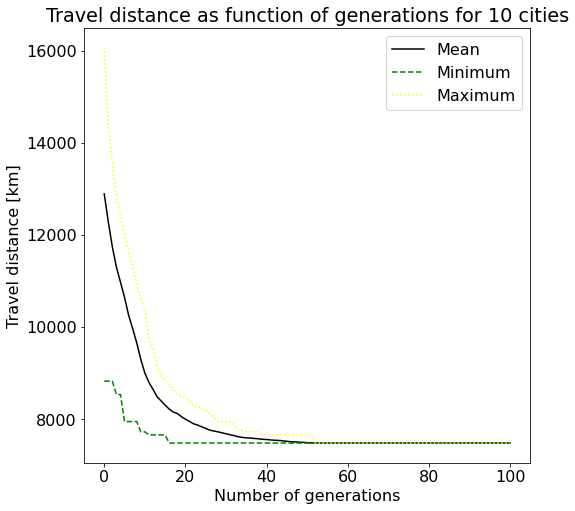

Time used is 0.19204126596450805 seconds
Minumum 7486.3099999999995 km
Maximum 7486.3099999999995 km
Mean 7486.310000000001 km
Standard deviation 1.8189894035458565e-12 km


In [17]:
path, dist, times, mean_dist = genetic(N_cities=10, N_pop=100, N_gen=100, plot=True, print_results=True)
#print(path)
#print(dist_func(path))

We see in the plot above that the phenotype in the population converge after around 50 generations.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

    
    
    
#### Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 
    
For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

    
How many tours were inspected by your GA as compared to by the exhaustive search?    
  
</div>



Considering the 10 first cities we compute the maximum, minimum, mean and standard deviation of 20 runs. We also determine the average time used.

In [18]:
N = 20
times_list = np.zeros(N)
dist_list = np.zeros(N)
for i in range(N):
    path, dist, times, mean_dist= genetic(N_cities=10, N_pop=100, N_gen=100, plot=False, print_results=False)
    times_list[i] = times
    dist_list[i] = dist

print(f'Average time used is {np.mean(times_list)} seconds')
print(f'Minumum {np.min(dist_list)} km')
print(f'Maximum {np.max(dist_list)} km')
print(f'Mean {np.mean(dist_list)} km')
print(f'Standard deviation {np.std(dist_list)} km')
    

Average time used is 3.428704559803009 seconds
Minumum 7486.3099999999995 km
Maximum 7745.8 km
Mean 7525.2300000000005 km
Standard deviation 76.83739330560354 km


The results are very simililar to those we aquired using the hill climber algorithm, but the genetic algorithm seems to be more consistant as well as use more time. 

We now do the same while considering all 24 cities. 

In [19]:
N = 20
times_list = np.zeros(N)
dist_list = np.zeros(N)
for i in range(N):
    path, dist, times, mean_dist= genetic(N_cities=24, N_pop=100, N_gen=150, plot=False, print_results=False)
    times_list[i] = times
    dist_list[i] = dist

print(f'Average time used is {np.mean(times_list)} seconds')
print(f'Minumum {np.min(dist_list)} km')
print(f'Maximum {np.max(dist_list)} km')
print(f'Mean {np.mean(dist_list)} km')
print(f'Standard deviation {np.std(dist_list)} km')

Average time used is 7.597259151935577 seconds
Minumum 12528.070000000003 km
Maximum 14958.43 km
Mean 13414.286000000002 km
Standard deviation 582.5644207072718 km


Again the genetic algorithm seem to produce similar but more consistant results at the cost of longer computation time.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
  

## Hybrid Algorithm (IN4050 only)

### Lamarckian


Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?
    
</div>

To solve this problem the genetic algorithm is copied and pasted below. The algorithm is then changed to have a local search after the children are created. There will be an option for running the algorithm in a Lamarckian or Baldwinian manner.

In [75]:
def hybrid_EA(N_cities, N_pop, N_gen, plot=False, print_results=False, method = 'Lamarckian', plot_mean=False):
    start_time = time.time()
    def print_min(popu):
        dist_arr = np.array((popu))[:,-1]
        min_dist = np.min(dist_arr.astype(np.float))
        print(f'Minumum dist is {min_dist}')

    pop = []
    parents = []
    children = []
    
    #initial paths
    for i in range(N_pop):
        pop.append(random.sample(cities[:N_cities], N_cities))
        pop[i].append(dist_func(pop[i]))
    
    #choosing parents
    def choose_parents():
        n = len(pop)//5 # parents pop is 1/5th the size of gen pop
        #n=2
        for i in range(n):
            dist = np.array((pop))[:,-1]
            indx = np.argmin(dist.astype(np.float))
            parents.append(pop[indx])
            pop.remove(pop[indx]) # removing parents from gen_pop

    #creating children from parents (parthenogenesis)
    def inversion_mutation():
        for i in range(len(parents)):
            indx = np.sort(np.random.randint(0,N_cities-1, size=2))
            if indx[0]==indx[1]:
                None
            else:
                child = parents[i][:indx[0]] + parents[i][indx[0]:indx[1]][::-1] + parents[i][indx[1]:-1]
                child.append(dist_func(child))
                children.append(child)
    # function for doing a local hill_climber on each of the children
    # Option for allowing the genotype to be updated (Lamarckian)
    # or only the fitness (Baldwinian)
    def local_search(n=50, method = 'Lamarckian'):
        for i in range(len(children)):
            child = children[i]
            new_child = []
            for j in range(n):
                swap1, swap2 = random.sample(child[:-1], 2)
                indx1 = np.where(np.array((child))==swap1)[0][0]
                indx2 = np.where(np.array((child))==swap2)[0][0]
                new_child[:] = child[:] # copy element wise to avoid coupling
                new_child[indx1]= swap2
                new_child[indx2]= swap1
                new_child[-1] = dist_func(new_child[:-1])
                if new_child[-1]<child[-1]:
                    child[:] = new_child[:]
            if method == 'Lamarckian':
                children[i] = child[:] # keeping the full genotype of local search child
            else:
                children[i][-1] = child[-1] # only keeping the fitness of local search child
    
    #selecting the N_pop number of best paths from pop, parents and children
    def selection():
        tot_pop = pop + parents + children
        pop.clear()
        parents.clear()
        children.clear()
        
        for i in range(N_pop):
            dist = np.array((tot_pop))[:,-1]
            indx = np.argmin(dist.astype(np.float))
            pop.append(tot_pop[indx])
            tot_pop.remove(tot_pop[indx])

    min_dist = []
    mean_dist = [] 
    max_dist = []
    
    dist_arr = np.array((pop))[:,-1]
    min_dist.append(np.min(dist_arr.astype(np.float)))
    max_dist.append(np.max(dist_arr.astype(np.float)))
    mean_dist.append(np.mean(dist_arr.astype(np.float)))
    #generation loop
    for i in range(N_gen):
        choose_parents()
        inversion_mutation()
        local_search(method=method)
        selection()
        
        dist_arr = np.array((pop))[:,-1]
        min_dist.append(np.min(dist_arr.astype(np.float)))
        max_dist.append(np.max(dist_arr.astype(np.float)))
        mean_dist.append(np.mean(dist_arr.astype(np.float)))
        
    if plot_mean==True:
        plt.plot(np.arange(N_gen+1), mean_dist, lw=0.9, label='HA, %s' % method)
    
    if plot==True:
        plt.figure(figsize = (8,8))
        plt.title(r'Travel distance as function of generations for %d cities' % N_cities)
        plt.plot(np.arange(N_gen+1), mean_dist, c='k',ls='solid', label='Mean')
        plt.plot(np.arange(N_gen+1), min_dist, c='green', ls ='dashed', label='Minimum')
        plt.plot(np.arange(N_gen+1), max_dist, c='yellow', ls ='dotted', label='Maximum')
        plt.ylabel('Travel distance [km]')
        plt.xlabel('Number of generations')
        plt.legend()
        plt.show()
    tot_time = time.time() - start_time
    if print_results==True:
        print(f'Time used is {np.mean(times)} seconds')
        print(f'Minumum {np.min((dist_arr.astype(np.float)))} km')
        print(f'Maximum {np.max((dist_arr.astype(np.float)))} km')
        print(f'Mean {np.mean((dist_arr.astype(np.float)))} km')
        print(f'Standard deviation {np.std((dist_arr.astype(np.float)))} km')
    
    dist = np.array((pop))[:,-1]
    indx = np.argmin(dist.astype(np.float))
    return pop[indx][:-1]+[pop[indx][0]], pop[indx][-1], tot_time, mean_dist

Having implemented the local search option in the genetic algorithm, thereby creating a hybrid EA, we perform a single run to get an impression on the performance of the algorithm. We evaluate the first 10 cities and choose a population size of 100. We evolve the population for 100 generations and let the local search generated genes be transfered in a Lamarckian manner. 

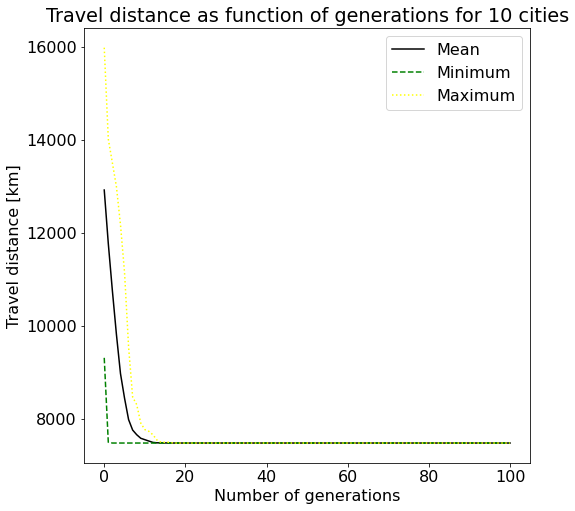

Time used is 13.566017150878906 seconds
Minumum 7486.309999999999 km
Maximum 7486.309999999999 km
Mean 7486.310000000001 km
Standard deviation 2.7284841053187847e-12 km


In [62]:
path, dist, times, mean_dist = hybrid_EA(N_cities=10, N_pop=100, N_gen=100, 
                                         plot=True, print_results=True, method = 'Lamarckian')

The test run finds the true optimum quickly and the population phenotype converges before 20 generations have passed. We now evaluate the algorithm the same way as for the genetic algorithm. We do this for both 10 and 24 cities in both cases with a Lamarckian and Baldwinian method.

In [66]:
N = 20
times_list = np.zeros(N)
dist_list = np.zeros(N)
for i in range(N):
    path, dist, times, mean_dist= hybrid_EA(N_cities=10, N_pop=100, N_gen=100, 
                                            plot=False, print_results=False, method = 'Lamarckian')
    times_list[i] = times
    dist_list[i] = dist

print(f'Average time used is {np.mean(times_list)} seconds')
print(f'Minumum {np.min(dist_list)} km')
print(f'Maximum {np.max(dist_list)} km')
print(f'Mean {np.mean(dist_list)} km')
print(f'Standard deviation {np.std(dist_list)} km')

Average time used is 6.145070374011993 seconds
Minumum 7486.309999999999 km
Maximum 7486.3099999999995 km
Mean 7486.3099999999995 km
Standard deviation 8.864657815874092e-13 km


In [72]:
N = 20
times_list = np.zeros(N)
dist_list = np.zeros(N)
for i in range(N):
    path, dist, times, mean_dist= hybrid_EA(N_cities=10, N_pop=100, N_gen=100, 
                                            plot=False, print_results=False, method = 'Baldwinian')
    times_list[i] = times
    dist_list[i] = dist

print(f'Average time used is {np.mean(times_list)} seconds')
print(f'Minumum {np.min(dist_list)} km')
print(f'Maximum {np.max(dist_list)} km')
print(f'Mean {np.mean(dist_list)} km')
print(f'Standard deviation {np.std(dist_list)} km')

Average time used is 6.384112656116486 seconds
Minumum 7486.309999999999 km
Maximum 7486.3099999999995 km
Mean 7486.3099999999995 km
Standard deviation 8.134767913360664e-13 km


The hybrid algorithm (HA) seems to be a bit slower than the genetic algorithm (GA). It is however a lot more consistent. The HA managed to find the true optimum in all 20 runs while the GA even though it managed to find the true optimum in at least one run, had a standard deviation of around 77km.  

We not perform the 20 run evaluation for the hybrid algorthm with both the Lamarckian and Baldwinian method. As in the case of the genetic algorithm, we evaluate for 150 generations in the 24 city case. 

In [73]:
N = 20
times_list = np.zeros(N)
dist_list = np.zeros(N)
for i in range(N):
    path, dist, times, mean_dist= hybrid_EA(N_cities=24, N_pop=100, N_gen=150, 
                                            plot=False, print_results=False, method = 'Lamarckian')
    times_list[i] = times
    dist_list[i] = dist

print(f'Average time used is {np.mean(times_list)} seconds')
print(f'Minumum {np.min(dist_list)} km')
print(f'Maximum {np.max(dist_list)} km')
print(f'Mean {np.mean(dist_list)} km')
print(f'Standard deviation {np.std(dist_list)} km')

Average time used is 12.973465871810912 seconds
Minumum 12287.069999999996 km
Maximum 12645.470000000001 km
Mean 12361.0105 km
Standard deviation 97.57514819230413 km


In [74]:
N = 20
times_list = np.zeros(N)
dist_list = np.zeros(N)
for i in range(N):
    path, dist, times, mean_dist= hybrid_EA(N_cities=24, N_pop=100, N_gen=150, 
                                            plot=False, print_results=False, method = 'Baldwinian')
    times_list[i] = times
    dist_list[i] = dist

print(f'Average time used is {np.mean(times_list)} seconds')
print(f'Minumum {np.min(dist_list)} km')
print(f'Maximum {np.max(dist_list)} km')
print(f'Mean {np.mean(dist_list)} km')
print(f'Standard deviation {np.std(dist_list)} km')

Average time used is 13.309957218170165 seconds
Minumum 12287.069999999996 km
Maximum 12767.140000000001 km
Mean 12393.299 km
Standard deviation 144.57639966121786 km


The two runs above for 24 cities with the HA produce significantly better results than the GA. They both find the same miniumum optimum, and both their maxima are better than the GAs mean. Both their standard deviations are significantly better than the GAs while the Lamarckian variant is better than the Baldwinian. 

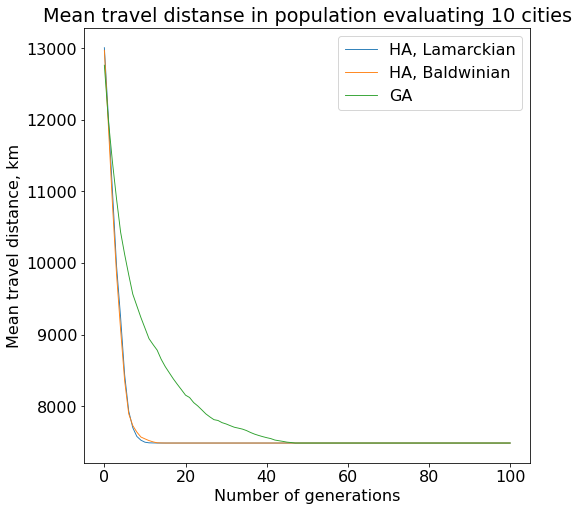

In [83]:
plt.figure(figsize=(8,8))
plt.title('Mean travel distanse in population evaluating 10 cities')
hybrid_EA(N_cities=10, N_pop=100, N_gen=100, plot=False, print_results=False, method = 'Lamarckian', plot_mean=True)
hybrid_EA(N_cities=10, N_pop=100, N_gen=100, plot=False, print_results=False, method = 'Baldwinian', plot_mean=True)
genetic(N_cities=10, N_pop=100, N_gen=100, plot=False, print_results=False, plot_mean=True)
plt.legend()
plt.ylabel('Mean travel distance, km')
plt.xlabel('Number of generations')
plt.show()

Above we see a plot of the mean travel distance in the population as a function of number of generations evolved.  We see that the two HA variants are very similar, while the GA performs worse. This run for the GA happens to have found the true optimum, but we see that it takes significantly more generations to converge the evolution of the population towards the optimum. 

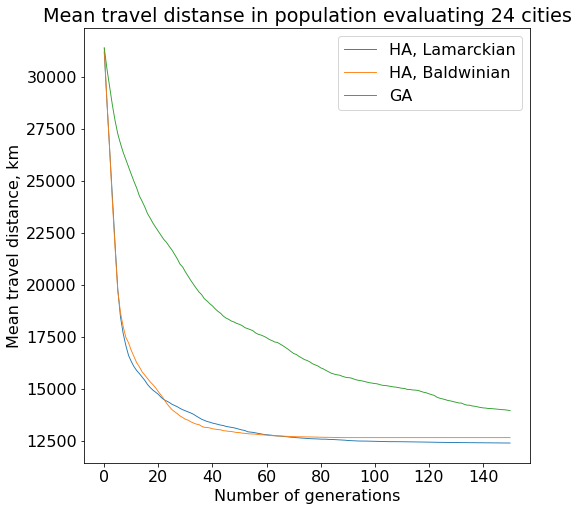

In [84]:
plt.figure(figsize=(8,8))
plt.title('Mean travel distanse in population evaluating 24 cities')
hybrid_EA(N_cities=24, N_pop=100, N_gen=150, plot=False, print_results=False, method = 'Lamarckian', plot_mean=True)
hybrid_EA(N_cities=24, N_pop=100, N_gen=150, plot=False, print_results=False, method = 'Baldwinian', plot_mean=True)
genetic(N_cities=24, N_pop=100, N_gen=150, plot=False, print_results=False, plot_mean=True)
plt.legend()
plt.ylabel('Mean travel distance, km')
plt.xlabel('Number of generations')
plt.show()

The the case of 24 cities we see that GA performs more poorly altogether. It is slower in evolving the fitness of the population and the final mean travel path is significantly worse than for the two HA variants. The Baldwinian variant seem to evolve the fitness faster initially, while the Lamarckian takes over having the best mean fitness after around 60 generations. 

### Final comments

I noticed around the time I had finished that I probably misunderstood the task of creating a genetic algorithm. I have realised that we are meant to implememt three different mutation-crossover methods and evaluate them. I wont be able to do this in time for the deadline, but I will instead include my answer to the weekly tasks were I implement the three methods. I hope you will come to the conclusion that I have had a satisfactory learning outcome even though I didn't fully answer all the questions in the manner they were meant to be answered. 
